## EJEMPLO REGRESION LINEAL

## ¿podemos predecir si una persona tendrá diabetes?

In [34]:
# importamos las librerias a usar
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [35]:
# importamos los datos
diabetes = load_diabetes()

In [36]:
# vemos la descripcion del dataset
print(diabetes.DESCR)
# vemos que tenemos 10 varibles independienes y un target o varibales dependiente que no aparece en 
# la tabla (sería la columna 11) y que deberemos añadir a nuestra tabla. Se corresponde con la 
# medida cuantitativa de la progresión de la enfermedad un año después del inicio.

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [37]:
# creamos nuestro dataframe para visualizar bien nuestros datos
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [38]:
# anañadimos nuestro target que la llamaremos 'prog'
df['prog'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [40]:
# vemos las dimensiones
df.shape

(442, 11)

In [43]:
# tabla de correlación.
# Vemos que los elementos que el elemento que más peso tiene en 'prog' es el 'bmi' (Índice de masa corporal)
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [46]:
# sacamos la variable independiente por un lado y la dependiente por otro
X = df['bmi'].values.reshape(-1,1)
y = df['prog'].values.reshape(-1,1)

In [47]:
# calculamos el modelo de regresion linear. Para ello importamos la libreria
from sklearn.linear_model import LinearRegression

In [48]:
# creamos el modelo linear
reg = LinearRegression().fit(X,y)

In [49]:
# hacemos la predicción de la nueva 'y_hat'
y_hat = reg.predict(X)

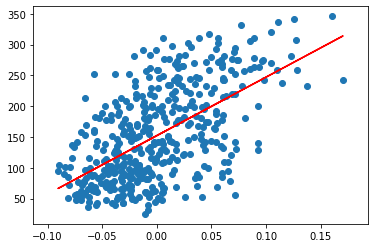

In [64]:
# hacemos una grafica de nuestro dataframe original y de la línea de predicción
plt.scatter(X,y)
plt.plot(X, y_hat, 'r-');

In [57]:
# vamos a tomar una muestra de 20 valores de nuestro dataframe
df_ = df.sample(20, random_state=100)

In [58]:
X_ = df_['bmi'].values.reshape(-1,1)
y_ = df_['prog'].values.reshape(-1,1)

In [61]:
reg_=LinearRegression().fit(X_,y_)

In [62]:
y_hat_=reg_.predict(X_)

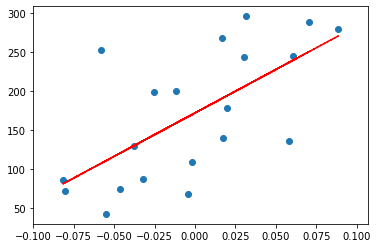

In [65]:
plt.scatter(X_,y_)
plt.plot(X_,y_hat_,"r--");

In [74]:
from sklearn.metrics import r2_score
# Calcuamos la metrica del coeficiente de determinacion 
r2_score(y, y_hat)

0.3439237602253803

In [75]:
r2_score(y_, y_hat_)

0.4289404976861021

Vemos que el índice de masa corporal no es realmente relevante para suponer que una persona pueda o no tener diabetes.